# Vibrational Transitions in CO Using Perturbation Theory
[Jay Foley, University of North Carolina Charlotte](https://foleylab.github.io/)

### Learning Outcomes  
By the end of this workbook, students should be able to:  
- Explain the choice of zero-order Hamiltonian and perturbation for finding approximate solutions to the quartic oscillator Hamiltonian
- Apply first- and second-order perturbation theory to obtain approximations to the fundamental transition
- Compute perturbative corrections using the harmonic oscillator eigenstates and energies, and interpret how parity arguments can be used to simplify these computations
- Convert between atomic unit and common unit systems
- Assess the accuracy of perturbative approximations using the Morse oscillator as the ground truth

---

### Summary  
In this activity, we study vibrational transitions of the carbon monoxide (CO) molecule using a quartic (fourth-order) polynomial approximation to the Morse potential.  While this potential appears simpler than the Morse potential, the quartic oscillator energy eigenvalue equation cannot be solved analytically (even though the Morse oscillator can be).  Nevertheless, it will give us some experience evaluating perturbative corrections to vibrational energies using an anharmonic potential.  We can also compare exact solutions of the Morse and harmonic oscillator potentials with perturbative approximations. We will carry out the first-order energy corrections by hand, and utilize python to compute the second-order corrections.  This provides an example of connecting quantum mechanical theory with computational practice.




# Plot of model potentials

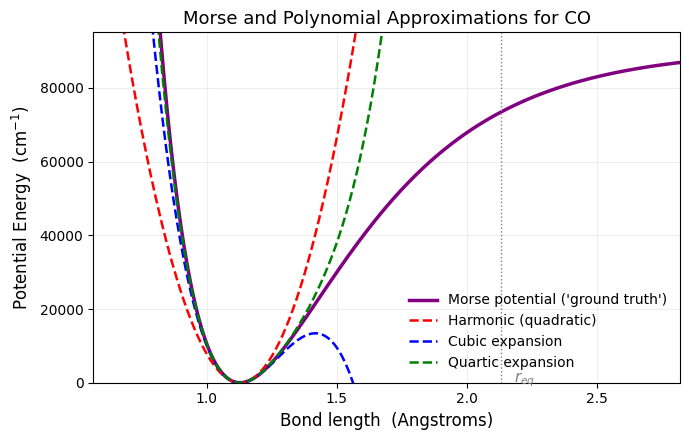

Dissociation energy De: 0.412511 a.u.
Equilibrium bond length r_eq: 2.132178 a.u.
Reduced mass mu: 12506.108747 a.u.
Morse parameter beta: 1.217108 a.u.
Force constant k: 1.222147 a.u.
Cubic constant g: -4.462453 a.u.
Quartic constant h: 12.672998 a.u.


In [2]:
# ——— Imports ———
import numpy as np
import matplotlib.pyplot as plt

# ——— Constants and conversions ———
De_eV = 11.225                     # Dissociation energy (eV)
r_eq_ang = 1.1283                  # Equilibrium bond length (Å)
mu_amu = 6.8606                    # Reduced mass (amu)
beta_inv_ang = 2.30                # Morse curvature (Å⁻¹)

# Conversion factors
eV_to_au = 1 / 27.2114             # 1 Eh = 27.2114 eV
au_to_ang = 0.52917721067121       # 1 a0 = 0.529177 Å
amu_to_au = 1822.888486            # 1 amu = 1822.888 me
au_to_invcm = 219474.63

# Convert parameters to atomic units
De_au   = De_eV * eV_to_au
r_eq_au = r_eq_ang / au_to_ang
mu_au   = mu_amu * amu_to_au
beta_au = beta_inv_ang * au_to_ang

# ——— Helper function ———
def morse_potential(r, De, beta, r_eq):
    """
    Evaluate the Morse potential at coordinate r (in atomic units).

    Parameters
    ----------
    r : array_like
        Internuclear distance(s) in a0.
    De : float
        Dissociation energy (Hartrees).
    beta : float
        Range parameter (a0⁻¹).
    r_eq : float
        Equilibrium bond length (a0).

    Returns
    -------
    V : ndarray
        Morse potential in Hartrees.
    """
    return De * (1 - np.exp(-beta * (r - r_eq)))**2


# ——— Define grid and potentials ———
r = np.linspace(0.5 * r_eq_au, 2.5 * r_eq_au, 500)

# Morse potential (exact)
V_Morse = morse_potential(r, De_au, beta_au, r_eq_au)

# Derivatives of Morse potential at r_eq (analytic)
k = 2 * De_au * beta_au**2
g = -6 * De_au * beta_au**3
h = 14 * De_au * beta_au**4

# Polynomial expansions around r_eq
x = r - r_eq_au
V_H = 0.5 * k * x**2 # pure harmonic
V_C = V_H + (1/6) * g * x**3 # harmonic + cubic
V_Q = V_C + (1/24) * h * x**4 # harmonic + cubic + quartic

# ——— Plotting ———
plt.style.use("seaborn-v0_8-colorblind")

fig, ax = plt.subplots(figsize=(7, 4.5))

ax.plot(r * au_to_ang, V_Morse * au_to_invcm, color="purple", lw=2.5, label="Morse potential ('ground truth')")
ax.plot(r * au_to_ang, V_H * au_to_invcm, "r--", lw=1.8, label="Harmonic (quadratic)")
ax.plot(r * au_to_ang, V_C * au_to_invcm, "b--", lw=1.8, label="Cubic expansion")
ax.plot(r * au_to_ang, V_Q * au_to_invcm, "g--", lw=1.8, label="Quartic expansion")

# Visual touches
ax.axvline(r_eq_au, color="gray", ls=":", lw=1)
ax.text(r_eq_au + 0.05, 0.02, r"$r_{eq}$", fontsize=11, color="gray")

ax.set_xlim(0.5 * r_eq_au * au_to_ang, 2.5 * r_eq_au * au_to_ang)
ax.set_ylim(0, De_au * 1.05 * au_to_invcm)
ax.set_xlabel("Bond length  (Angstroms)", fontsize=12)
ax.set_ylabel("Potential Energy  (cm$^{-1}$)", fontsize=12)
ax.set_title("Morse and Polynomial Approximations for CO", fontsize=13)
ax.legend(frameon=False, fontsize=10)
ax.grid(alpha=0.2)

plt.tight_layout()
plt.savefig("Quartic.png",dpi=300)
plt.show()


# print out the following constants in atomic units
print(f"Dissociation energy De: {De_au:.6f} a.u.")
print(f"Equilibrium bond length r_eq: {r_eq_au:.6f} a.u.")
print(f"Reduced mass mu: {mu_au:.6f} a.u.")
print(f"Morse parameter beta: {beta_au:.6f} a.u.")  
# print out the force constants in atomic units
print(f"Force constant k: {k:.6f} a.u.")
print(f"Cubic constant g: {g:.6f} a.u.")
print(f"Quartic constant h: {h:.6f} a.u.")

---
### Full Quartic Oscillator Hamiltonian
We can express the quartic oscillator Hamiltonian as 
$$
\hat{H} = -\frac{\hbar^2}{2\mu} \frac{d^2}{dx^2} + \frac{1}{2}k x^2 + \frac{1}{6} g x^3 + \frac{1}{24} h x^4.
$$
where here we understand $x \equiv r - r_{eq}$ to be the bond length displaced by the equilibrium bond length such that the potential has a minumum at $x = 0 \rightarrow r = r_{eq}$.

To draw some correspondence to the Morse oscillator model, we can write the Taylor expansion of the Morse potential around $r-r_{eq}$

$$
V_T(r) = \sum_{n=0}^\infty \frac{f^{(n)}(r_{eq})}{n!} (r - r_{eq})^n,
$$ 

where $f^{(n)}(r_{eq})$ is the $n^{th}$-order derivative of the Morse potential evaluated at the equilibrium bondlength, e.g. $f^{(1)}(r_{eq}) = \frac{d}{dr}V_{Morse}(r_{eq})$.

This leads to the following relations for each termin the quartic oscillator in terms of the Morse oscillator model

$$
k = \left. \frac{dV_{\text{Morse}}(r)}{dr} \right|_{r = r_{\text{eq}}} = 2 D_e \beta^2
$$
$$
g = \left. \frac{d^2V_{\text{Morse}}(r)}{dr^2} \right|_{r = r_{\text{eq}}}= -6  De \beta^3
$$

$$
h = \left. \frac{d^3V_{\text{Morse}}(r)}{dr^3} \right|_{r = r_{\text{eq}}} = 14  De \beta^4
$$

---

### Harmonic Oscillator Reference

We choose the harmonic oscillator as the zeroth-order Hamiltonian:

$$
\hat{H}_0 = -\frac{\hbar^2}{2\mu} \frac{d^2}{dx^2} + \frac{1}{2} k x^2, \qquad \omega=\sqrt{\frac{k}{\mu}},
$$

and define

$$
\alpha=\frac{\mu\omega}{\hbar}.
$$

The **harmonic oscillator eigenfunctions** are

$$
\psi_v^{(0)}(x)=\frac{1}{\sqrt{2^v v!}}\left(\frac{\alpha}{\pi}\right)^{1/4}
H_v(\sqrt{\alpha}\,x)\,e^{-\alpha x^2/2},
$$

where $H_n$ are the physicists’ Hermite polynomials.  A few relevant Hermite polynomials are

| $H_v(\sqrt{\alpha}\,x)$ | parity |
|---|---|
| $H_0(\sqrt{\alpha}\,x) = 1$ | even |
| $H_1(\sqrt{\alpha}\,x) = 2\sqrt{\alpha}\,x$ | odd |
| $H_2(\sqrt{\alpha}\,x) = 4\alpha \,x^2-2$ | even |
| $H_3(\sqrt{\alpha}\,x) = 8\alpha^{3/2} x^3 - 12 \sqrt{\alpha}\,x$ | odd |



### Question 1

Why is 

$$
E_v^{(0)} = \hbar \omega \left(v + \frac{1}{2}\right)
$$

an appropriate zeroth-order energy expression for the quartic oscillator?

**a.** This is an appropriate zeroth-order energy expression because $v = 0 $ is the ground state  
**b.** This is the expression for the Morse oscillator energy eigenvalues  
**c.** This is the expression for the quartic oscillator energy eigenvalues
**d.** This is the expression for the exact energy eigenvalues of the unperturbed problem 


### Question 2

Compute the **zeroth-order approximation** to the fundamental transition energy.  
Express your answer in **atomic units** and in **$\,\text{cm}^{-1}$**.

**a.**  0.004942 a.u., 1084 $\text{cm}^{-1}$  
**b.**  0.01485 a.u., 3254 $\text{cm}^{-1}$  
**c.**  0.004927 a.u., 1081 $\text{cm}^{-1}$  
**d.**  0.009885 a.u., 2169 $\text{cm}^{-1}$



### Question 3

Why is  

$$
V'(x) = \frac{g}{6}x^3 + \frac{h}{24}x^4
$$  

an appropriate perturbation for the **quartic oscillator model**?

**a.**  It contains the difference between the full potential and the potential of the zeroth-order Hamiltonian  
**b.**  This part of the potential makes the full Hamiltonian (harmonic + quartic) hard or impossible to solve analytically  
**c.**  This potential represents a relatively small correction to the zeroth-order potential (see plot of potentials) 

**d.**  All of the above


With this form of the perturbation, the first order corrections for the energy of a given state $|\psi_v\rangle$ can be written as
$$
E_v^{(1)} = \langle v|V'(x)|v\rangle = \int_{-\infty}^{\infty}\psi_v^{(0)}(x)\,V'(x)\,\psi_v^{(0)}(x)\,dx.                  
$$
Expanding the potential within these bra-kets gives:
$$
\frac{g}{6}\langle v|x^3|v\rangle + \frac{h}{24}\langle v|x^4|v\rangle = \frac{g}{6} \int_{-\infty}^{\infty}\psi_v^{(0)}(x)\,x^3\,\psi_v^{(0)}(x)\,dx + \frac{h}{24} \int_{-\infty}^{\infty}\psi_v^{(0)}(x)\,x^4\,\psi_v^{(0)}(x)\,dx.
$$

### Question 4

Using **parity arguments**, identify the bra-kets that must go to zero in the first-order corrections to any state  
$E_v^{(1)}$.

**a.**  $\langle v|x^4|v\rangle$ goes to zero for all $v$  
**b.**  $\langle v|x^3|v\rangle$ goes to zero for all $v$  
**c.**  $\langle v|x^4|v\rangle$ goes to zero for odd values of $v$ (e.g. $v = 1$) and $\langle v|x^3|v\rangle$ goes to zero for even values of $v$ (e.g. $v = 0$)  
**d.**  $\langle v|x^4|v\rangle$ goes to zero for even values of $v$ (e.g. $v = 0$) and $\langle v|x^3|v\rangle$ goes to zero for odd values of $v$ (e.g. $v = 1$)




To address the last question, express the fundamental transition energy up to first order in perturbation theory.  In particular, you need to compute the energy of the relevant states $|\psi_{v_i}\rangle$ and $|\psi_{v_f}\rangle$ that defines the fundamental transition up to first order and then compute the appropriate energy difference $\Delta E_{fund} = E_{v_f} - E_{v_i}$ where each energy is approximated up to first order in perturbation theory.

 

**Question 5**  Which of the following expressions is the most accurate way to represent the fundamental transition energy for the quartic oscillator up to first order in perturbation theory?

**a.**  $\Delta E_{\text{fund}} = \big( E_1^{(0)} + E_1^{(1)} \big) - \big( E_0^{(0)} + E_0^{(1)} \big)$

**b.**  $\Delta E_{\text{fund}} = \big( E_1^{(0)} - E_0^{(0)} \big) + E_1^{(1)}$  
**c.**  $\Delta E_{\text{fund}} = \big( E_1^{(0)} - E_0^{(0)} \big) + \big( E_1^{(1)} + E_0^{(1)} \big)$  
**d.**  $\Delta E_{\text{fund}} = E_1^{(0)} - E_0^{(0)}$  



### Question 6 (for free response and discussion)
Compute the first-order correction to the ground-state energy using

$$
E_0^{(1)} = \langle 0 | V'(x) | 0 \rangle = \int_{-\infty}^{\infty}\psi_v^{(0)}(x)\,V'(x)\,\psi_v^{(0)}(x)\,
$$
and express your answer in atomic units and in inverse centimeters.

**Useful Integral Relation**
Definite integrals over all space of even-parity polynomials multiplied by Gaussians have the following form:
$$ \int_{-\infty}^{\infty} x^{2n} {\rm e}^{-\alpha x^2} dx = \frac{\sqrt{\pi}}{2^n \alpha^{n + \frac{1}{2}}} \frac{(2n)!}{2^n n!} $$

### Question 7 (for free response and discussion)
The first-order correction to the first excited-state energy is
$$ E_1^{(1)} \approx 0.0001295 \; \text{a.u.} \approx 28.43 \: \text{cm}^{-1} $$

Given this and your answer to Question 6, compute the fundamental transition energy of the quartic oscillator up to first order in perturbation theory and compare it to the fundamentals from the analogous harmonic oscillator and Morse oscillators:

### Comparison of Fundamental Transition Energies

| Model | Fundamental Frequency (cm⁻¹) |
|:------------------------------|:----------------:|
| Harmonic Oscillator | 2169. |
| Morse Oscillator    | 2143. |
| Perturbation Theory (1st Order) | --- |


# Second-order energy corrections
We will now investigate how going to second order in perturbation theory will change our approximation to the fundamental transition.  The code block below builds some helper functions to compute the requisite matrix elements,
and then these are utilized in the subsequent code blocks to compute the fundamental up to second order.


In [3]:
from numpy import trapz
from scipy.special import hermite
from math import factorial
hbar_au = 1
def compute_alpha(k, mu, hbar):
    """ Helper function to compute \alpha = \sqrt{k * \omega / \hbar}
    
    Arguments
    ---------
    k : float
        the Harmonic force constant
        
    mu : float
        the reduced mass
        
    hbar : float
        reduced planck's constant
        
    Returns
    -------
    alpha : float
        \alpha = \sqrt{k * \omega / \hbar}
    
    """
    # compute omega
    omega = np.sqrt( k / mu )
    
    # compute alpha
    alpha =  mu * omega / hbar
    
    # return alpha
    return alpha

def N(n, alpha):
    """ Helper function to take the quantum number n of the Harmonic Oscillator and return the normalization constant
        
    Arguments
    ---------
    n : int
        the quantum state of the harmonic oscillator
        
    Returns
    -------
    N_n : float
        the normalization constant
    """
    
    return  np.sqrt( 1 / (2 ** n * factorial(n)) ) * ( alpha / np.pi ) ** (1/4) 

def psi(n, alpha, r, r_eq):
    """ Helper function to evaluate the Harmonic Oscillator energy eigenfunction for state n
        
    Arguments
    ---------
    n : int
        the quantum state of the harmonic oscillator
        
    alpha : float
        alpha value
        
    
    r : float
        position at which psi_n will be evaluated
        
    r_eq : float
        equilibrium bondlength
        
    Returns
    -------
    psi_n : float
        value of the harmonic oscillator energy eigenfunction
        
    """
    
    Hr = hermite(n)
    
    psi_n = N(n, alpha) * Hr( np.sqrt(alpha) * ( r - r_eq )) * np.exp( -0.5 * alpha  * (r - r_eq)**2)
    
    return psi_n

def harmonic_eigenvalue(n, k, mu, hbar):
    """ Helper function to evaluate the energy eigenvalue of the harmonic oscillator for state n"""
    
    return hbar * np.sqrt(k/mu) * (n + 1/2)

def morse_eigenvalue(n, k, mu, De, hbar):
    """ Helper function to evaluate the energy eigenvalue of the Morse oscillator for state n"""
    
    omega = np.sqrt( k / mu )
    xi = hbar * omega / (4 * De)

    return hbar * omega * ( (n + 1/2) - xi * (n + 1/2) ** 2)

def potential_matrix_element(n, m, alpha, r, r_eq, V_p):
    """ Helper function to compute <n|V_p|m> where V_p is the perturbing potential
    
    Arguments
    ---------
    n : int
        quantum number of the bra state
        
    m : int
        quantum number of the ket state
        
    alpha : float
        alpha constant for bra/ket states
        
    r : float
        position grid for bra/ket states
        
    r_eq : float
        equilibrium bondlength for bra/ket states
        
    V_p : float
        potential array
        
    Returns
    -------
    V_nm : float
        <n | V_p | m > 
    
    """
    # bra 
    psi_n = psi(n, alpha, r, r_eq)
    
    # ket 
    psi_m = psi(m, alpha, r, r_eq)
    
    # integrand
    integrand = np.conj(psi_n) * V_p * psi_m
    
    # integrate
    V_nm = np.trapz(integrand, r)
    
    return V_nm

# compute alpha
alpha = compute_alpha(k, mu_au, hbar_au)

# compute psi_0 along the r grid
psi_0 =psi(0, alpha, r, r_eq_au)

# is it normalized?
Integral = trapz(psi_0 ** 2, r)

assert np.isclose(Integral, 1.0)


In [6]:
E0_harmonic = harmonic_eigenvalue(0, k, mu_au, hbar_au)
E0_morse = morse_eigenvalue(0, k, mu_au, De_au, hbar_au)
E1_harmonic = harmonic_eigenvalue(1, k, mu_au, hbar_au)
E1_morse = morse_eigenvalue(1, k, mu_au, De_au, hbar_au)

# define the perturbing potential as the the difference between V_Q and V_H
V_pert = V_Q - V_H

# compute first order corrections
E0_fo_correction = potential_matrix_element(0, 0, alpha, r, r_eq_au, V_pert)
d = h / 24
_expected_E0_fo = ( 3 * d) / (4 * alpha ** 2)
E1_fo_correction = potential_matrix_element(1, 1, alpha, r, r_eq_au, V_pert)

# compute energy up to first order
E1_pt1 = E1_harmonic + E1_fo_correction
E0_pt1 = E0_harmonic + E0_fo_correction

# compute fundamental frequencies at different levels of theory
fundamental_harmonic_au = E1_harmonic - E0_harmonic
fundamental_morse_au = E1_morse - E0_morse
fundamental_pt1_au = E1_pt1 - E0_pt1

# print results
print(F"First order correction to ground state energy: {E0_fo_correction * au_to_invcm} cm^-1")
print(F"Expected first order correction to ground state energy: {_expected_E0_fo * au_to_invcm} cm^-1")
print(F"Difference between computed and expected: {(E0_fo_correction - _expected_E0_fo) * au_to_invcm} cm^-1")
print(F"First order correction to first excited state energy: {E1_fo_correction} au")
print(F"First order correction to first excited state energy: {E1_fo_correction * au_to_invcm} cm^-1")
print("Fundamental Frequency (Harmonic) : ", fundamental_harmonic_au * au_to_invcm, " cm^-1")
print("Fundeamental Frequency in au (Harmonic): ", fundamental_harmonic_au)
print("Fundamental Frequency (Morse)    : ", fundamental_morse_au * au_to_invcm, " cm^-1")
print("Fundamental Frequency (PT1)      : ", fundamental_pt1_au * au_to_invcm, " cm^-1")

First order correction to ground state energy: 5.686802216774283 cm^-1
Expected first order correction to ground state energy: 5.686802216774276 cm^-1
Difference between computed and expected: 6.692480737072095e-15 cm^-1
First order correction to first excited state energy: 0.00012955488788782298 au
First order correction to first excited state energy: 28.434011083871432 cm^-1
Fundamental Frequency (Harmonic) :  2169.626233701669  cm^-1
Fundeamental Frequency in au (Harmonic):  0.009885544555658526
Fundamental Frequency (Morse)    :  2143.6294235678447  cm^-1
Fundamental Frequency (PT1)      :  2192.3734425687667  cm^-1


In [ ]:
# set up 2nd order correction to ground state energy and first excited state energy
E0_so_correction = 0.0
E1_so_correction = 0.0

for m in range(0, 10):
    if m != 0:
        V_0m = potential_matrix_element(0, m, alpha, r, r_eq_au, V_pert)
        E0_so_correction += ( np.abs(V_0m) ** 2 ) / ( E0_harmonic - harmonic_eigenvalue(m, k, mu_au, hbar_au) )
        print(F"m={m}, V_0m = {V_0m * au_to_invcm} cm^-1, contribution to E0_so: {( np.abs(V_0m) ** 2 ) / ( E0_harmonic - harmonic_eigenvalue(m, k, mu_au, hbar_au) ) * au_to_invcm} cm^-1")
    
    if m != 1:
        V_1m = potential_matrix_element(1, m, alpha, r, r_eq_au, V_pert)
        E1_so_correction += ( np.abs(V_1m) ** 2 ) / ( E1_harmonic - harmonic_eigenvalue(m, k, mu_au, hbar_au) )
        print(F"m={m}, V_1m = {V_1m * au_to_invcm} cm^-1, contribution to E1_so: {( np.abs(V_1m) ** 2 ) / ( E1_harmonic - harmonic_eigenvalue(m, k, mu_au, hbar_au) ) * au_to_invcm} cm^-1")

E0_pt2 = E0_pt1 + E0_so_correction
E1_pt2 = E1_pt1 + E1_so_correction

fundamental_pt2_au = E1_pt2 - E0_pt2
print(F"Second order correction to ground state energy: {E0_so_correction * au_to_invcm} cm^-1")
print(F"Second order correction to first excited state energy: {E1_so_correction * au_to_invcm} cm^-1")
print("Fundamental Frequency (PT2)      : ", fundamental_pt2_au * au_to_invcm, " cm^-1")
 
          